In [27]:
pip install textblob

     |████████████████████████████████| 645kB 1.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install wordcloud

     |████████████████████████████████| 163kB 1.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [28]:
movies = df
# df_1['sentiment'].replace(to_replace='positive', value=1, inplace=True)
# df_1['sentiment'].replace(to_replace='negative', value=0, inplace=True)

In [29]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [30]:
print("Propotion of movie reviews \n", df.sentiment.value_counts()/len(df.sentiment))

Propotion of movie reviews 
 negative    0.5
positive    0.5
Name: sentiment, dtype: float64


In [31]:
# Length of the revirew

length_reviews = df.review.str.len()


In [32]:
longest_review = max(length_reviews)

In [33]:
print(f'Longest review: {max(length_reviews)}')
print(f'Shortest review: {min(length_reviews)}')

Longest review: 13704
Shortest review: 32


In [34]:
movies = df
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
movies['sentiment'].replace(to_replace='positive', value=1, inplace=True)
movies['sentiment'].replace(to_replace='negative', value=0, inplace=True)
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [36]:
movies['review_length'] = movies['review'].str.len()
movies_sorted = movies.sort_values(by=['review_length'], ascending=False)
movies_sorted

,review,sentiment,review_length
31481,Match 1: Tag Team Table Match Bubba Ray and Sp...,1,13704
40521,There's a sign on The Lost Highway that says:<...,1,12988
31240,"(Some spoilers included:)<br /><br />Although,...",1,12930
31436,"Back in the mid/late 80s, an OAV anime by titl...",1,12129
5708,**Attention Spoilers**<br /><br />First of all...,1,10363
...,...,...,...
19874,This movie is terrible but it has some good ef...,0,52
28920,Primary plot!Primary direction!Poor interpreta...,0,51
40817,I hope this group of film-makers never re-unites.,0,49
31072,"What a script, what a story, what a mess!",0,41


In [37]:
review = df.review[0]

In [38]:
blob_review = TextBlob(review)
print(blob_review.sentiment)

Sentiment(polarity=0.023433179723502305, subjectivity=0.4903686635944701)


In [39]:
review_1 = df.review[1]
review_1

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [40]:
bob_1 = TextBlob(review_1)
print(bob_1.sentiment)

Sentiment(polarity=0.1097222222222222, subjectivity=0.5593434343434344)


In [41]:
review_500 = df.review[500]
review_500

"What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing about with classics when they clearly have no idea of the real intention or point of the original. This version is no different. I felt that the Ralph Fiennes version is much worse though as the casting of Juliette brioche as Kathy has got to be the worst casting decision EVER...anyway back to this version. It aims to make the story relevant to a contemporary setting and in a musical style. It succeeds in both but high art it is nit. Throwaway viewing for a rainy day maybe...The direction was average and the editing abysmal. Worse than the old Quincy. Deepak Verma does a great turn as Hindley and is in fact one of Britains wasted talents. The part of Heath was played with great charm and belief and I think that the casting is the strongest point of this project. Although a more talented director would have made better use of the facilities he had. Its clear that he was a director for hire

In [42]:
bob_500 = TextBlob(review_500)
print(bob_500.sentiment)

Sentiment(polarity=0.1465972222222222, subjectivity=0.4579166666666667)


In [43]:
# Word Cloud

In [61]:
titanic = movies.review[[31481]]
titanic_1 = str(titanic)

In [62]:
cloud_titanic = WordCloud(background_color='white').generate(titanic_1)

In [48]:
# creating figure of the generated cloud

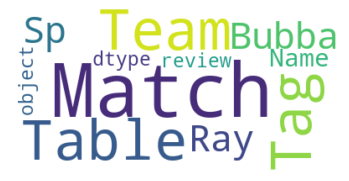

In [49]:
plt.imshow(cloud_titanic, interpolation='bilinear')
plt.axis('off')
plt.show()

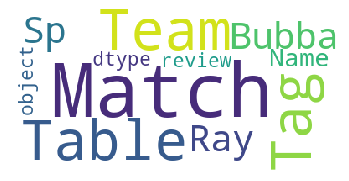

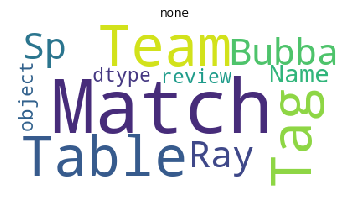

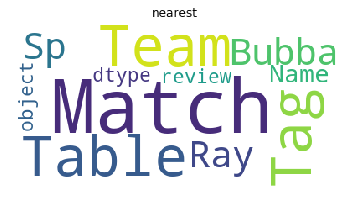

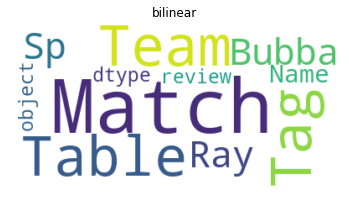

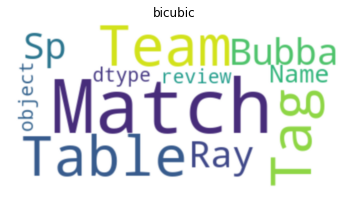

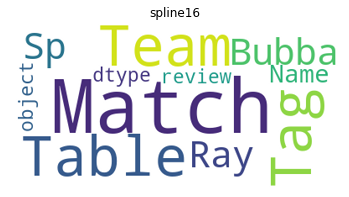

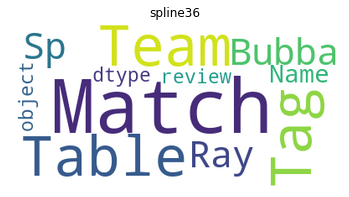

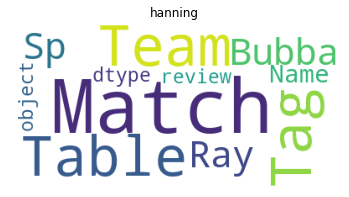

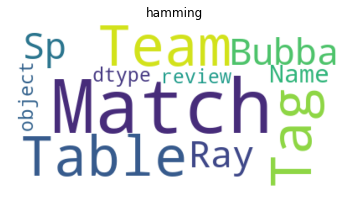

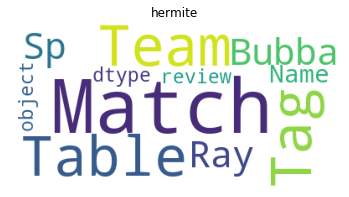

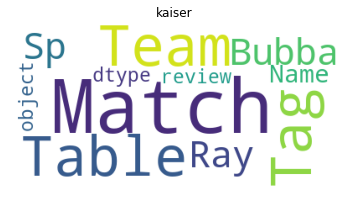

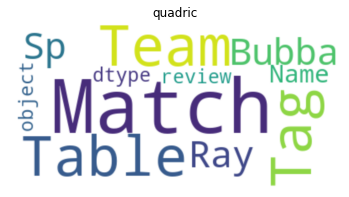

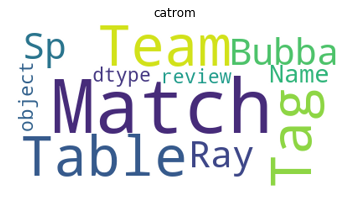

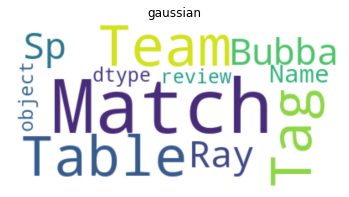

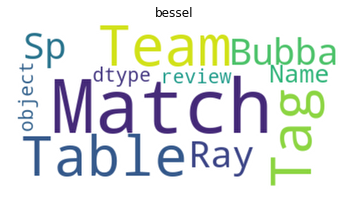

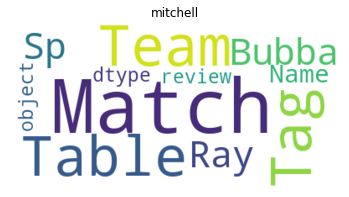

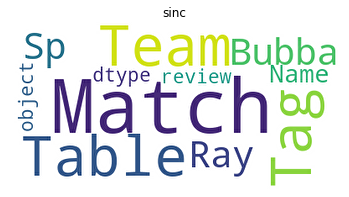

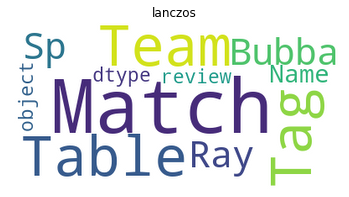

In [50]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
for m in methods:
    plt.imshow(cloud_titanic, interpolation=m)
    plt.axis('off')
    plt.title(m)
    plt.show()

In [51]:
movies.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [52]:
movies.sentiment==1

0         True
1         True
2         True
3        False
4         True
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: sentiment, Length: 50000, dtype: bool

In [53]:
print(movies.sentiment)

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [54]:
senitment = movies.sentiment
review = movies.review
description = []
for i in range(len(movies.sentiment)):
    if movies.sentiment[i] ==1:
        description.append(review[i])
        
print(len(review))
print(len(description))
print(description[0])

50000
25000
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is du

In [63]:
description_1 = str(description)

In [64]:
my_cloud = WordCloud(background_color='white', stopwords=STOPWORDS).generate(description_1) 

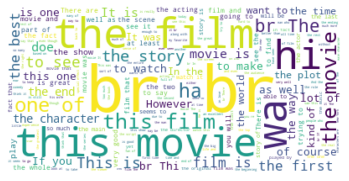

In [58]:
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
# Build the vectorizer 


In [65]:
vectorizer = CountVectorizer()
vectorizer.fit(titanic)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
titanic_bow = vectorizer.transform(titanic)


In [103]:
print(titanic_bow.toarray())

[[  3   1   1  15   4   3   2   2   1   1  98  26   3   1   1   1   2   1
    3   2   2   5   1   8   1   5   3   5  13   1   1   1   1   1   4   1
    1   2   3   5   1   1   1   2  13   1   2   1   1   8   2  11   1   1
    1   1   1   1   3  12   2   5   1   1   2  20   1   1   1   1  13   5
    5   1  17   1   1  40   9   1   1   4   1   1   1   1   1   1   5   1
    1  10   4   1   2   1   3   1  12   1   1   1   1   2   1   1   4   7
    1   1   1   1   1   1   2   1   2   6   4   4   1   6   1   2   2   1
    1   1   1   2   1   1   3   1   2   3   1   4   2   1   1   1   1   1
    1   5   1   1   1   1   2   1   1   1   2   1  10   1   3   1   2   1
    5   1   2   2   1   1   3   8   1   1   1   1   2   1   1   1   3   2
    1   1   5   2   1   1   1   1   4   1   1   1   2   2   1   1   1   1
    1   3  19   1   2   1   1   1   2  14   1   1   4   1   4   1   7   3
    1   1   1   1   1   5   1   1  13   1   4   1   3   1   9   1   1   5
    1   1   1   1   1   3   4   2   1 

In [107]:
titanic_df = pd.DataFrame(titanic_bow.toarray(), columns=vectorizer.get_feature_names())
titanic_df

,about,according,advantage,after,again,against,all,allowed,allowing,an,...,withstood,wolverine,wood,world,would,wwe,y2j,years,you,young
0,3,1,1,15,4,3,2,2,1,1,...,1,2,1,1,6,5,2,1,1,1


In [110]:
titanic_df.columns

Index(['about', 'according', 'advantage', 'after', 'again', 'against', 'all',
       'allowed', 'allowing', 'an',
       ...
       'withstood', 'wolverine', 'wood', 'world', 'would', 'wwe', 'y2j',
       'years', 'you', 'young'],
      dtype='object', length=668)

In [97]:
vectorizer.fit(movies.review[0:10000])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [98]:
movies_1 = vectorizer.transform(movies.review[0:10000])

In [99]:
movies_df = pd.DataFrame(movies_1.toarray(), columns=vectorizer.get_feature_names())

In [100]:
movies_df.columns

Index(['00', '000', '00001', '0069', '007', '00am', '00s', '01', '0126',
       '01pm',
       ...
       'être', 'ís', 'ísnt', 'île', 'ïn', 'óli', 'önsjön', 'über', 'überwoman',
       'ünfaithful'],
      dtype='object', length=52640)

In [101]:
movies_df['sentiment'] = movies['sentiment'][0:10000]

In [102]:
y = movies_df['sentiment']

In [103]:
X = movies_df.drop('sentiment', axis=1).dropna(how='any')

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 52639 entries, 00 to ünfaithful
dtypes: int64(52639)
memory usage: 3.9 GB


In [105]:
X.shape

(10000, 52639)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [110]:
log_reg = LogisticRegression().fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [112]:
y_pred = log_reg.predict(X_test)

In [114]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8735


In [115]:
y_probab = log_reg.predict_proba(X_test)

In [116]:
y_probab

array([[1.12870811e-05, 9.99988713e-01],
       [9.98620299e-01, 1.37970122e-03],
       [4.81435654e-02, 9.51856435e-01],
       ...,
       [9.36472553e-01, 6.35274470e-02],
       [3.18140335e-01, 6.81859665e-01],
       [5.06814441e-01, 4.93185559e-01]])